In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression #Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 #classification
from sklearn.metrics import mean_squared_error, r2_score #regression
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder


In [27]:
# Define paths
DATA_PATH = "C:/Users/Fariha/Downloads/Practice Projects"
#OUTPUT_PATH = "output/"
#os.makedirs(OUTPUT_PATH, exist_ok=True)

In [37]:
# Load data from a CSV file (if the file is downloaded locally)
file_path = os.path.join(DATA_PATH, "healthcare_dataset.csv")
data = pd.read_csv(file_path)

In [39]:
data.shape

(55500, 15)

In [43]:
data=data.drop(['Name', 'Date of Admission','Discharge Date'], axis=1)

In [ ]:
#Data Preprocessing

In [45]:
print(f"Initial Data shape:{data.shape}")
print(data.head())
# 1. Initial Data Overview: Check for missing values
print("Missing values per column:")
missing_values = data.isnull().sum()  # Count missing values in each column
missing_percentage = (missing_values / len(data)) * 100  # Calculate percentage of missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))  # Sort by missing percentage
# # 2. Visualize missing values
# plt.figure(figsize=(12, 8))
# sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Values Heatmap")
# plt.show()


# # 3. Handle Missing Values
# # Drop columns with > 80% missing data
# data = data.dropna(thresh=int(0.8 * len(data)), axis=1)

# # Fill missing numerical values with the column mean and categorical values with the mode
# for col in data.columns:
#     if data[col].dtype in ['float64', 'int64']:
#         data[col].fillna(data[col].mean(), inplace=True)
#     elif data[col].dtype == 'object':
#         data[col].fillna(data[col].mode()[0], inplace=True)

# # 4. Check for Outliers using IQR method
# for col in data.select_dtypes(include=['float64', 'int64']).columns:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identify outliers
#     outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
#     if not outliers.empty:
#         print(f"\nOutliers for column '{col}':")
#         print(outliers)

#     # Remove outliers
#     data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# print(f"Shape after outlier removal: {data.shape}")
#5. Feature Engineering (if necessary, create new features)
# (Optional) Example of new feature creation
# data['new_feature'] = data['feature1'] / (data['feature2'] + 1e-6)

# 6. Encode Categorical Variables(one hot encoding)
#data = pd.get_dummies(data, drop_first=True)  # One-hot encoding for categorical columns

# Specify categorical columns to encode
categorical_columns = ["Age", "Gender", "Blood Type", "Medical Condition", "Doctor", 
                       "Hospital", "Insurance Provider", "Room Number", 
                       "Admission Type", "Medication", "Test Results"]

# Initialize the OrdinalEncoder
ord_enc = OrdinalEncoder()

# Apply Ordinal Encoding directly to the selected columns (overwriting the original ones)
data[categorical_columns] = ord_enc.fit_transform(data[categorical_columns])

# 7. Feature Scaling (Normalize numerical features)
# Select only numerical columns for scaling
scaler = MinMaxScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMaxScaler to numerical columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# 8. Final Data Overview
print(f"Data after preprocessing: {data.shape}")
print(data.head())


Initial Data shape:(55500, 12)
        Age  Gender  Blood Type  Medical Condition    Doctor  Hospital  \
0  0.223684     1.0    0.714286                0.4  0.659693  0.750671   
1  0.644737     1.0    0.000000                1.0  0.834110  0.401555   
2  0.828947     0.0    0.142857                1.0  0.937729  0.137254   
3  0.197368     0.0    0.857143                0.6  0.558032  0.308890   
4  0.394737     0.0    0.285714                0.4  0.526996  0.842583   

   Insurance Provider  Billing Amount  Room Number  Admission Type  \
0                0.25        0.380933     0.568922             1.0   
1                0.75        0.650904     0.411028             0.5   
2                0.00        0.547053     0.260652             0.5   
3                0.75        0.728798     0.874687             0.0   
4                0.00        0.296622     0.894737             1.0   

   Medication  Test Results  
0        0.75           1.0  
1        0.25           0.5  
2        0.00

In [ ]:
#4. Exploratory Data Analysis (EDA)



Basic Statistics:
                Age        Gender    Blood Type  Medical Condition  \
count  55500.000000  55500.000000  55500.000000       55500.000000   
mean       0.507098      0.500432      0.498942           0.499769   
std        0.257927      0.500004      0.327100           0.341667   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.289474      0.000000      0.142857           0.200000   
50%        0.513158      1.000000      0.428571           0.600000   
75%        0.723684      1.000000      0.714286           0.800000   
max        1.000000      1.000000      1.000000           1.000000   

             Doctor      Hospital  Insurance Provider  Billing Amount  \
count  55500.000000  55500.000000        55500.000000    55500.000000   
mean       0.500617      0.492957            0.502338        0.502947   
std        0.285856      0.278651            0.352536        0.259462   
min        0.000000      0.000000            0.000000     

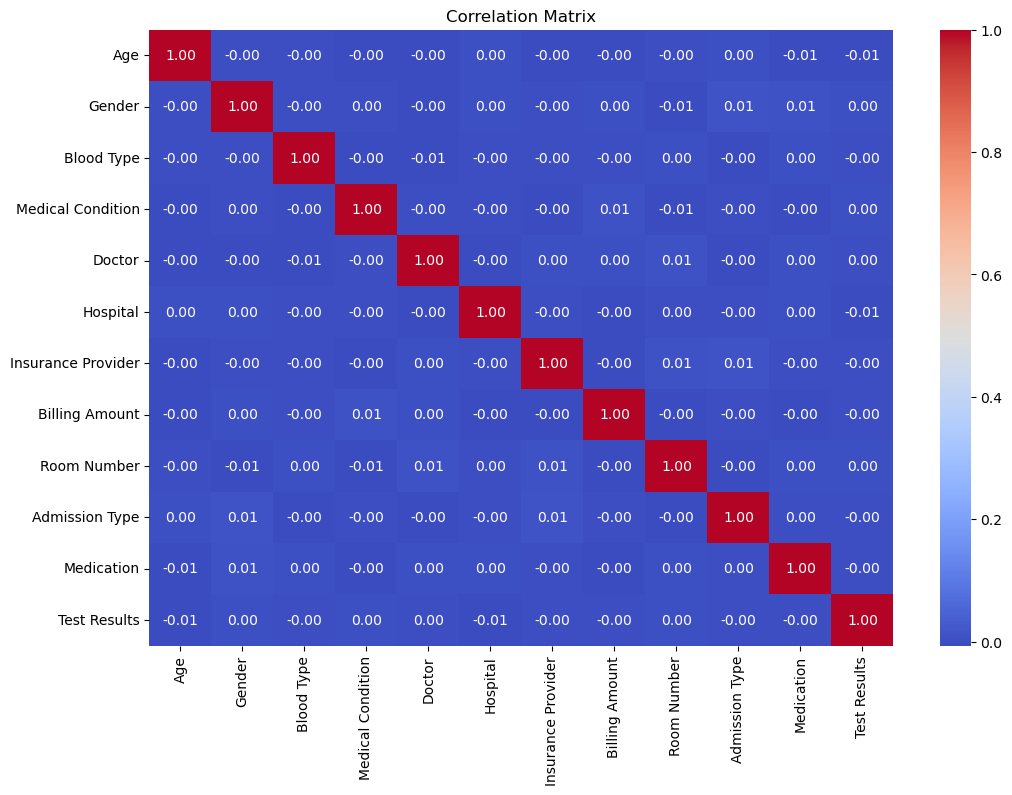

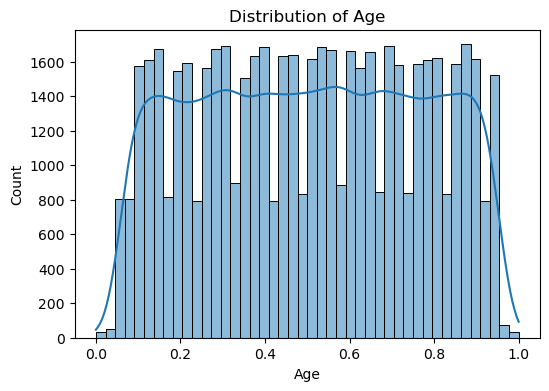

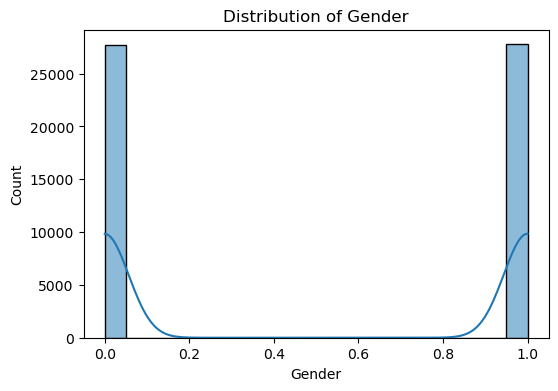

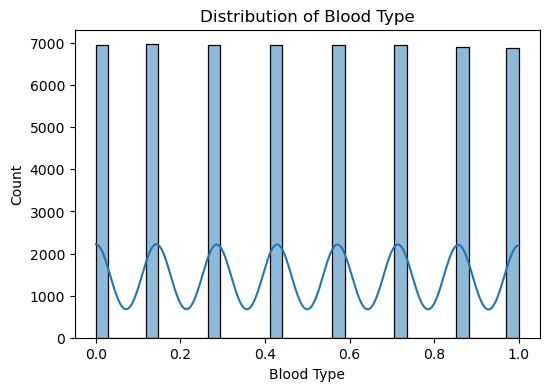

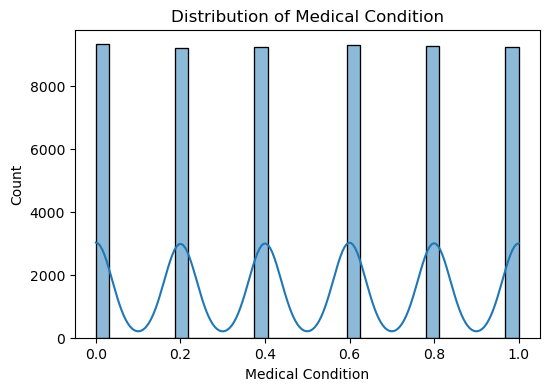

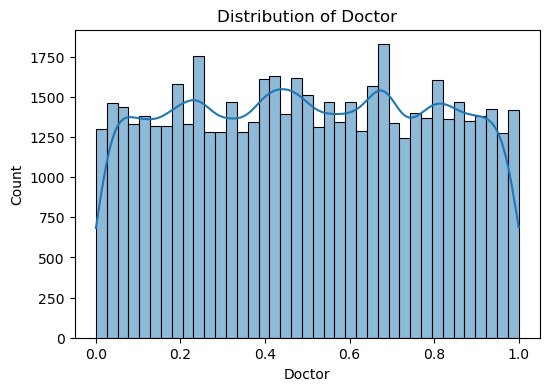

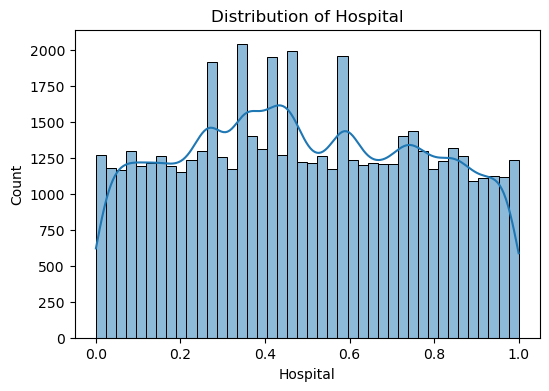

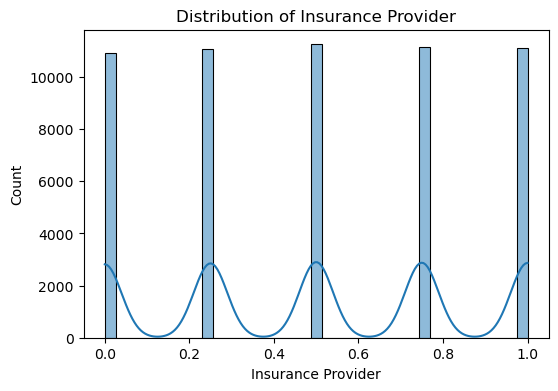

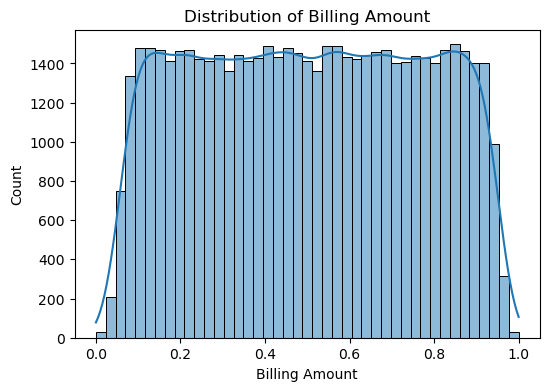

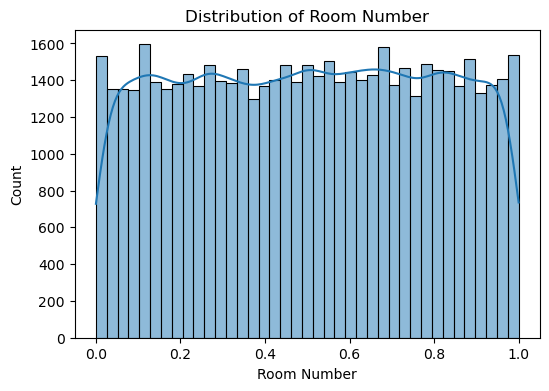

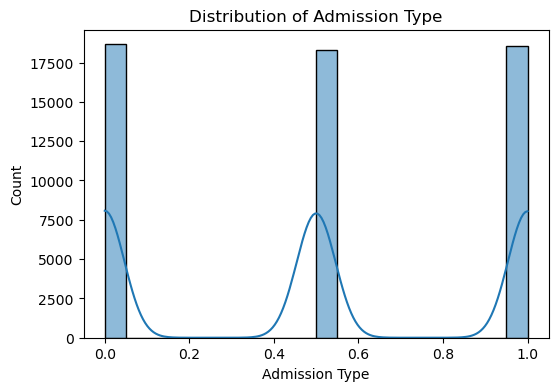

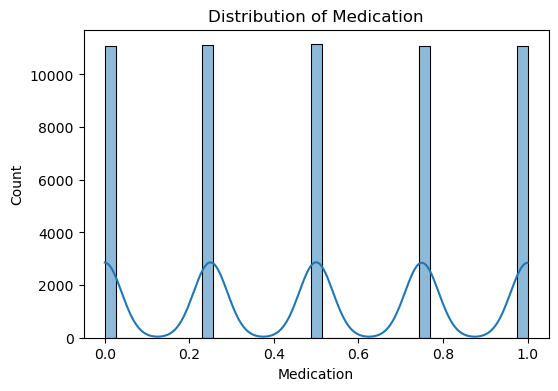

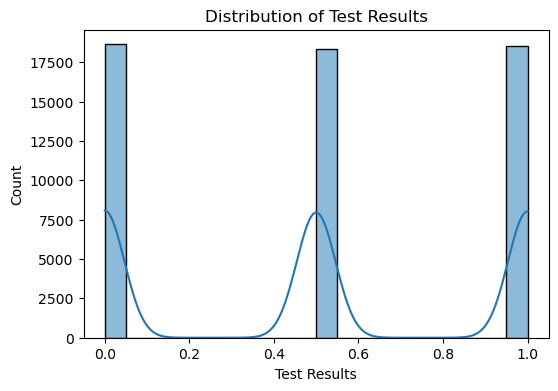

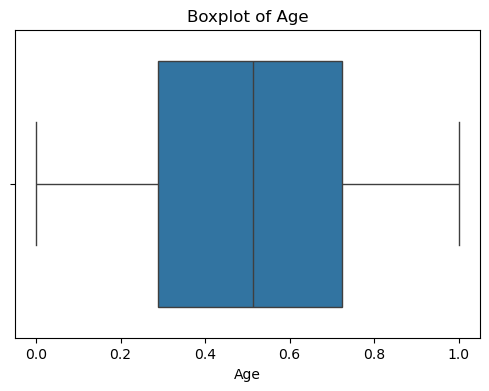

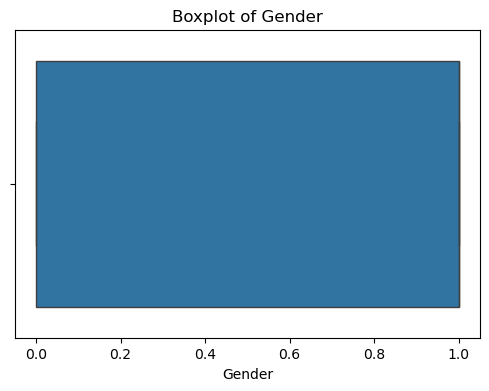

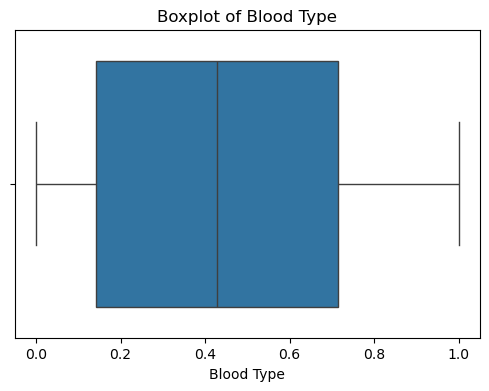

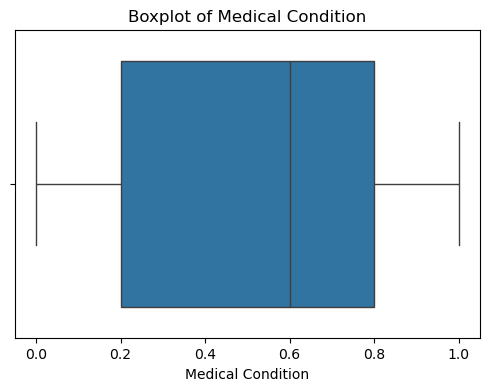

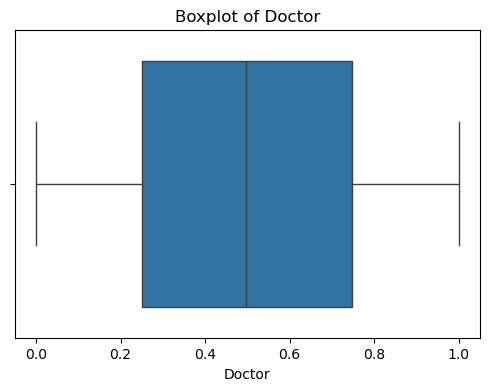

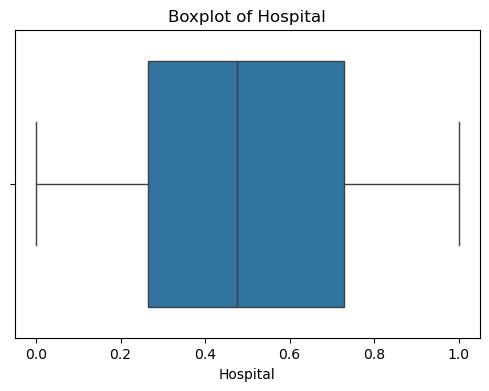

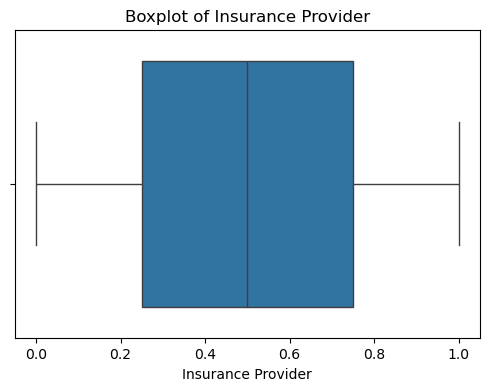

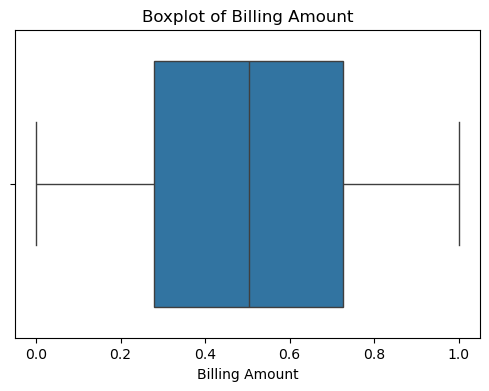

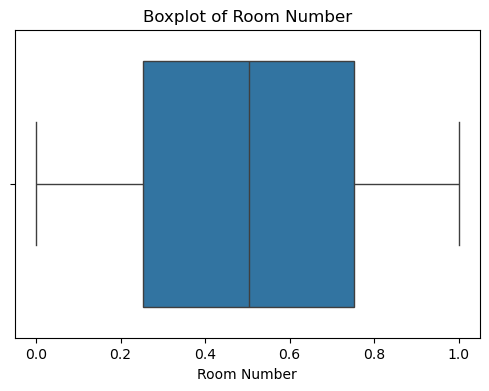

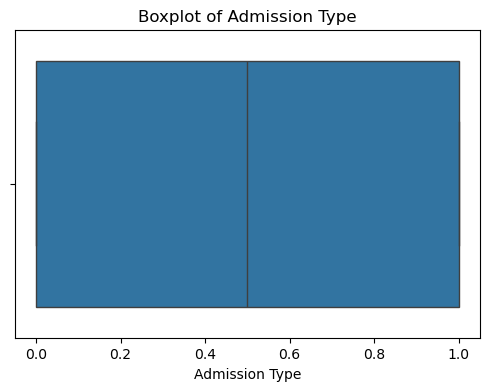

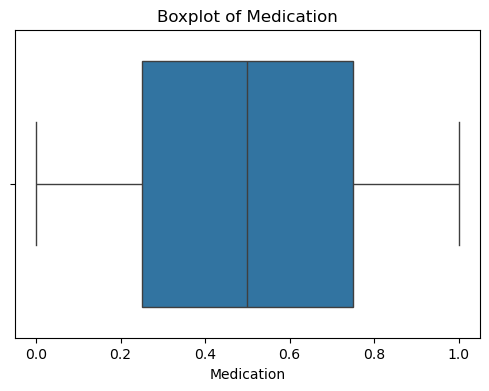

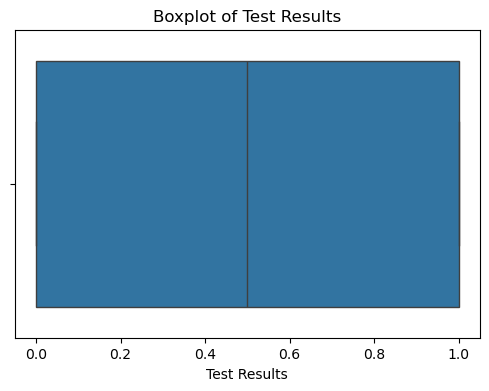

In [49]:
# 4.1 Basic Statistical Summaries
print("\nBasic Statistics:")
print(data.describe())

# 4.2 Correlation Analysis
# Compute and plot the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 4.3 Feature Distributions
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# 4.4 Class Balance (for classification tasks)
if 'test_result' in data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='test_result', data=data)
    plt.title("Class Distribution (Test Result)")
    plt.xlabel("Test Result")
    plt.ylabel("Count")
    plt.show()

# 4.5 Boxplots for Outliers
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [ ]:
#5. Train-Test Split

In [55]:
# Define features and target
SEED=42
target_column = 'Test Results'  # Column we want to predict
features = data.drop(columns=[target_column])
target = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=SEED)


In [ ]:
#6. Model Training (Regression)

In [67]:
# 1. Initialize the Linear Regression Model
model = LinearRegression()

# 2. Train the Model on Training Data
model.fit(X_train, y_train)
print("Model training completed.")

# 3. Predict on Test Data
y_pred = model.predict(X_test)

# 4. Evaluate the Model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score): {r2}")


Model training completed.
Mean Squared Error (MSE): 0.1685209256143796
R-squared (R2 Score): 8.213297338599546e-05


In [59]:
#6. Model Training (Classification)

45174    0.0
10214    1.0
43199    0.0
31626    1.0
9273     0.5
Name: Test Results, dtype: float64
float64


In [79]:
# Ensure the target variable is categorical
y_train = y_train.astype('category')
y_test = y_test.astype('category')

# Alternatively, explicitly encode the target variable into integer classes
target_mapping = {0.0: 0, 0.5: 1, 1.0: 2}
y_train = y_train.map(target_mapping)
y_test = y_test.map(target_mapping)

# Check the unique target values after conversion
print("Unique target classes in y_train:", y_train.unique())
print("Unique target classes in y_test:", y_test.unique())

# Initialize and train the classifier
classifier = LogisticRegression(random_state=SEED)
classifier.fit(X_train, y_train)
print("Model training completed.")

# Make predictions
y_pred = classifier.predict(X_test)

Unique target classes in y_train: [0, 2, 1]
Categories (3, int64): [0, 1, 2]
Unique target classes in y_test: [1, 0, 2]
Categories (3, int64): [0, 1, 2]
Model training completed.


In [ ]:
# Evaluate the classifier


Confusion Matrix:
[[1330 1205 1219]
 [1308 1157 1152]
 [1305 1189 1235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.35      0.35      3754
           1       0.33      0.32      0.32      3617
           2       0.34      0.33      0.34      3729

    accuracy                           0.34     11100
   macro avg       0.34      0.34      0.34     11100
weighted avg       0.34      0.34      0.34     11100


Accuracy: 0.34


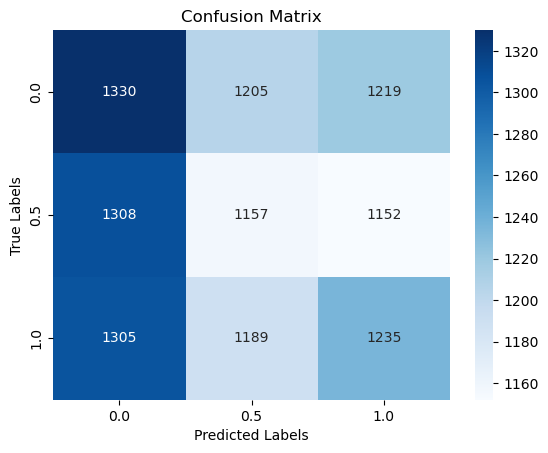

In [85]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0.0', '0.5', '1.0'], yticklabels=['0.0', '0.5', '1.0'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()